In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:

dataset = pd.read_excel("../KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",header=1)

C:\Users\Rojan\AppData\Local\Temp\ipykernel_20340\3778056745.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  dataset = pd.read_excel("../KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",header=1)


In [10]:
dataset.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [12]:
#default column is not required so we remove it
dataset.drop(["default"],axis=1,inplace=True)

In [67]:
def plot_na_dataset(dataset):
    x = []
    y= []
    fig = plt.figure(figsize = (10, 2))

    for col in dataset.columns:
        print(col)
        z = dataset[col].isna().sum()
        if z > 0:
            x.append(col[:10])
            y.append(z * 100 / dataset[col].count())

    plt.bar(x,y,width=0.2)
    plt.xlabel("Features")
    plt.ylabel("Missing Values %")

    plt.show()

In [14]:
###Exploratory Data Analysis and Data Cleaning

# No changes in customer_id, First Name and Last Name
##Gender

dataset["gender"].value_counts()


Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [15]:
def gen(x):
    if x[0]=="M" or x[0]=="m":
        return 'M'
    elif x[0]=="F" or x[0] =="f":
        return 'F'
    else :
        return "U"
 

In [16]:
## remove the gender that have 'U' 
dataset['gender'] = dataset['gender'].apply(gen)
dataset['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

In [17]:
dataset = dataset[dataset['gender']!="U"]

<AxesSubplot:>

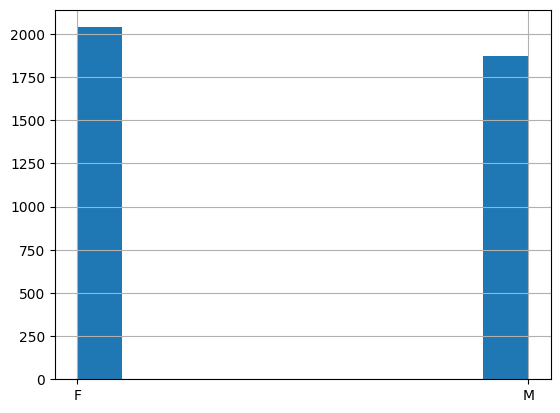

In [18]:
dataset["gender"].hist()

In [19]:
##past_3_years_bike_related_purchases
## no Nan values 
## nothing unusual in the dataset 
dataset["past_3_years_bike_related_purchases"].describe()

count    3912.000000
mean       49.039366
std        28.768226
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [20]:
today = pd.Timestamp.now()

In [21]:
today.year

2023

In [22]:
##DOB
dataset["age"] =  today.year - dataset["DOB"].dt.year 

In [23]:
dataset['age'].describe()

count    3912.000000
mean       45.935072
std        12.617249
min        21.000000
25%        36.000000
50%        46.000000
75%        55.000000
max        92.000000
Name: age, dtype: float64

<AxesSubplot:>

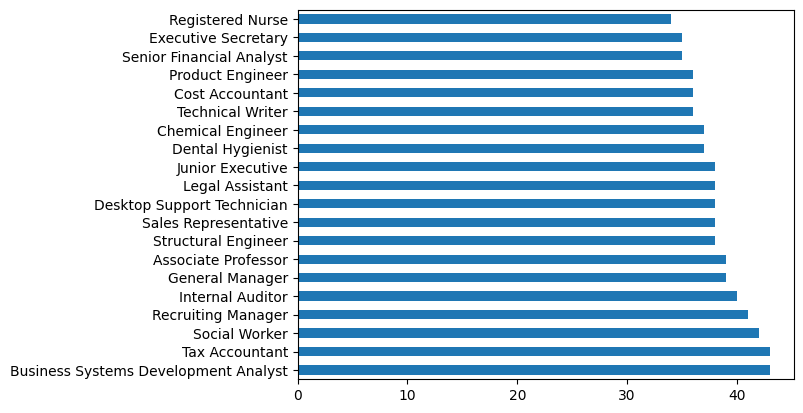

In [24]:
#job_title	job_industry_category	wealth_segment	deceased_indicator	default	owns_car	tenure

dataset["job_title"].value_counts().nlargest(n=20).plot.barh()

<AxesSubplot:>

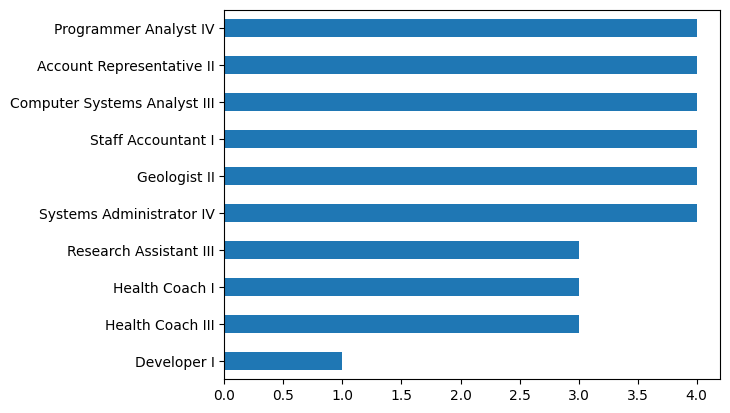

In [25]:
dataset["job_title"].value_counts().nsmallest(n=10).plot.barh()

<AxesSubplot:>

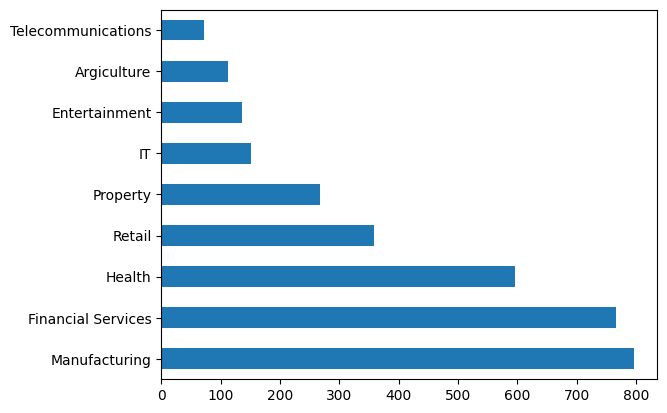

In [26]:
dataset["job_industry_category"].value_counts().plot.barh()

<AxesSubplot:>

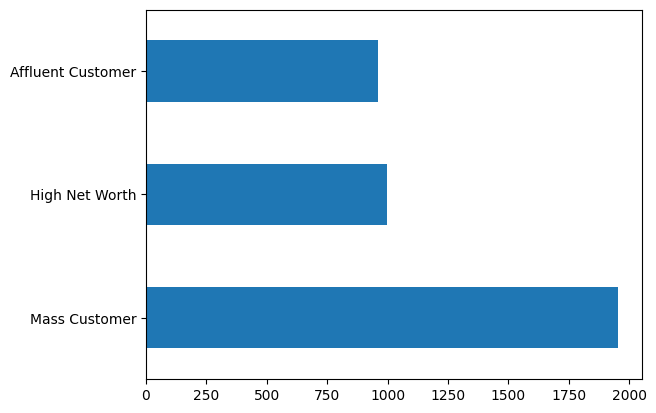

In [27]:
dataset["wealth_segment"].value_counts().plot.barh()

In [28]:
#deceased_indicator	default	owns_car	tenure

dataset["deceased_indicator"].value_counts()

N    3910
Y       2
Name: deceased_indicator, dtype: int64

In [29]:
dataset["owns_car"].value_counts()

Yes    1974
No     1938
Name: owns_car, dtype: int64

In [30]:
df = dataset[["wealth_segment","owns_car"]].copy()

In [31]:
df

,wealth_segment,owns_car
0,Mass Customer,Yes
1,Mass Customer,Yes
2,Mass Customer,Yes
3,Mass Customer,No
4,Affluent Customer,Yes
...,...,...
3994,Mass Customer,Yes
3995,Mass Customer,No
3996,High Net Worth,Yes
3998,Affluent Customer,Yes


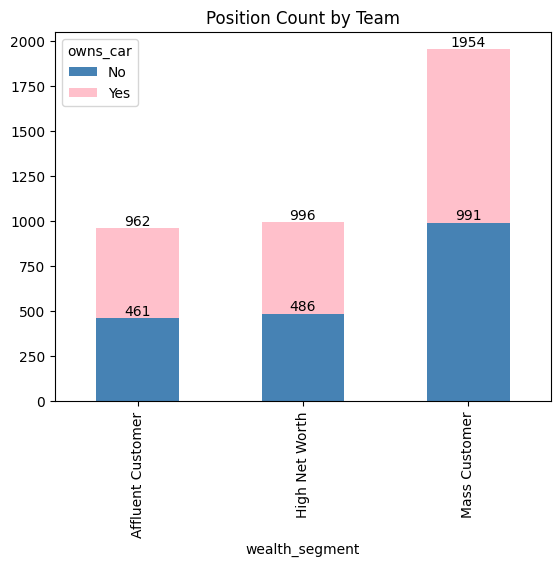

In [32]:
ax = df.groupby(['wealth_segment','owns_car']).size().unstack().plot(kind='bar', stacked=True,
            color=['steelblue','pink'], title='Position Count by Team')
for container in ax.containers:
    ax.bar_label(container)


Text(0, 0.5, 'In Years')

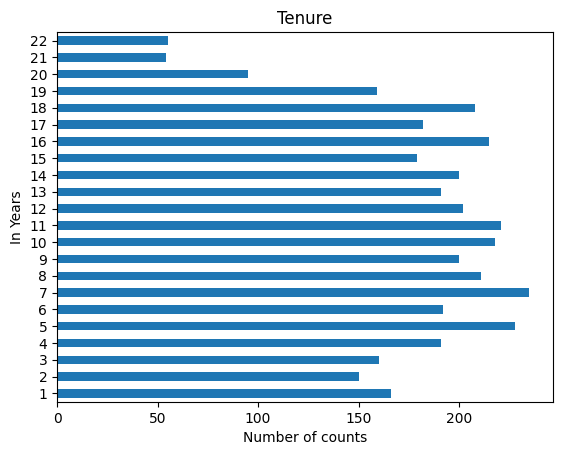

In [33]:
ax = dataset['tenure'].astype('int').value_counts().sort_index().plot.barh(title="Tenure")
ax.set_xlabel("Number of counts")
ax.set_ylabel("In Years")

<AxesSubplot:title={'center':'Total past 3 year bike per industry'}, ylabel='job_industry_category'>

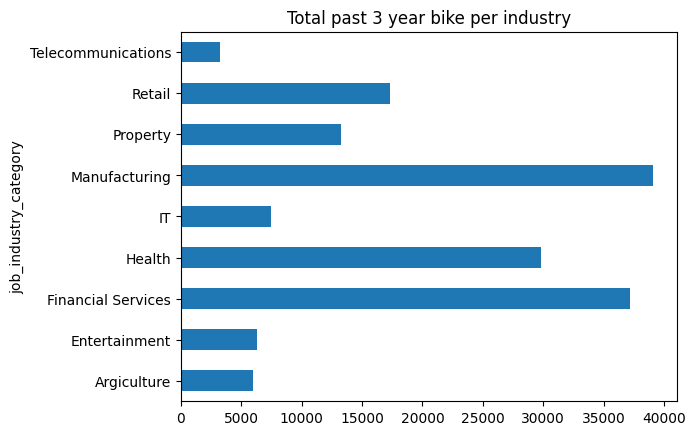

In [34]:
dataset.groupby("job_industry_category")["past_3_years_bike_related_purchases"].sum().plot.barh(title="Total past 3 year bike per industry")

In [55]:
df = dataset[["customer_id","gender","age","job_industry_category","wealth_segment","owns_car","tenure"]].copy()

In [60]:
df = df.set_index('customer_id')

In [62]:
demo_df_clean =df.dropna()

In [39]:
address_dataset =pd.read_excel("../KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerAddress",header=1,index_col=0)

In [40]:
address_dataset.head(1)

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10


In [41]:
address_dataset["state"].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [44]:
### New South Wale --> NSW Victoria --> VIC
##remove Nan values
address_dataset['state'].replace('New South Wales', 'NSW', inplace=True)
address_dataset['state'].replace('Victoria', 'VIC', inplace=True)
addr_df_clean = address_dataset.dropna()
addr_df_clean.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [64]:
demo_addr_combined = pd.merge(demo_df_clean,addr_df_clean,left_index=True,right_index=True)

In [65]:
demo_addr_combined.head()

,gender,age,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,
1,F,70,Health,Mass Customer,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
2,M,43,Financial Services,Mass Customer,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
4,M,62,IT,Mass Customer,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
6,M,57,Retail,High Net Worth,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9
7,F,47,Financial Services,Affluent Customer,Yes,11.0,4 Delaware Trail,2210,NSW,Australia,9


In [ ]:
dataset.groupby("job_industry_category")["past_3_years_bike_related_purchases"].sum().plot.barh(title="Total past 3 year bike per industry")

<AxesSubplot:title={'center':'Customer in each state'}, xlabel='state'>

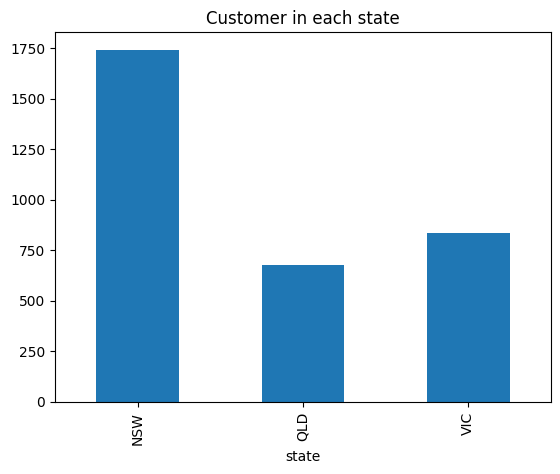

In [77]:
demo_addr_combined.groupby('state')["age"].count().plot.bar(title="Customer in each state")

In [88]:
##property valuation division 
def bin_prop_valuation(x):
    if x >= 1 and x <=3:
        return "Normal"
    elif x>3 and x<=6:
        return "Mid range"
    elif x>6 and x<=9:
        return "Expensive"
    else: return "Very Expensive"
demo_addr_combined["property_label"] = demo_addr_combined["property_valuation"].apply(bin_prop_valuation)

In [93]:
demo_addr_combined.groupby(["state","property_label"])["property_label"].count().unstack()

property_label,Expensive,Mid range,Normal,Very Expensive
state,,,,
NSW,799,175,125,642
QLD,257,221,176,22
VIC,383,163,101,189


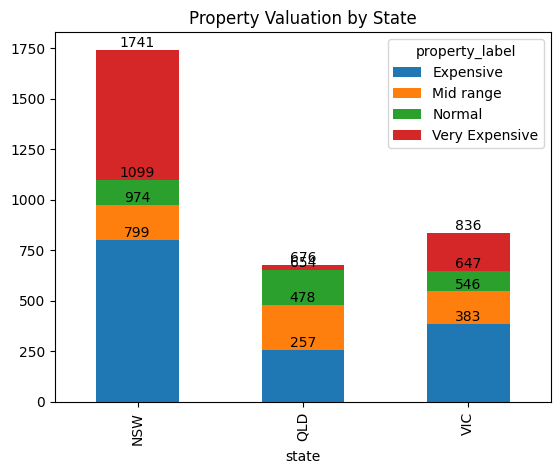

In [96]:
ax = demo_addr_combined.groupby(["state","property_label"])["property_label"].count().unstack().plot(kind='bar',stacked=True,title="Property Valuation by State")
for container in ax.containers:
    ax.bar_label(container)